# Data Exploration and Visualization
### Conducted by: Dr. Abhishek Agarwal
### Date: 20-April-2021


# Home Work 4 (Amir Ali)

1. Calculate the sum of squares between groups
2. Calculate the sum of squares within groups
3. Fill in the ANOVA table
4. How much of the variance in height is explained by the treatment group?
5. Plot the results

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
df=pd.read_csv('treatment.csv',sep=';')

In [4]:
df.head(2)

,treatment1,treatment2,treatment3,treatment4
0,60,50,48,47
1,67,52,49,67


In [5]:
print(df.shape)

(10, 4)


#### Question 1

In [6]:
#sum of square between groups groups
mean_total = df.to_numpy().reshape(-1).mean()
sum_of_square_between_groups = ((df.mean()-mean_total)**2).sum()*len(df.index)
print(sum_of_square_between_groups)

196.5000000000001


#### Question 2

In [7]:
#sum of square within groups 
sum_of_square_within_groups = ((df-df.mean())**2).sum().sum()
print(sum_of_square_within_groups)

2060.6


#### Question 3

In [8]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['treatment1'], df['treatment2'], df['treatment3'], df['treatment4'])
print(fvalue, pvalue)

1.1443268950791026 0.3443595629359094


In [9]:
df_melt = pd.melt(df.reset_index(), 
                  id_vars=['index'], 
                  value_vars=['treatment1', 'treatment2', 'treatment3', 'treatment4'])

In [10]:
df_melt.columns = ['index', 'treatments', 'value']

In [11]:
df_melt.head()

,index,treatments,value
0,0,treatment1,60
1,1,treatment1,67
2,2,treatment1,42
3,3,treatment1,67
4,4,treatment1,56


In [16]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),196.5,3.0,1.144327,0.34436
Residual,2060.6,36.0,NaN,NaN


#### Question 4

In [13]:
variance = np.var(df_melt)
print(variance)

index     8.2500
value    56.4275
dtype: float64


In [ ]:
# more than half of the variance is explained by the treatment groups. 

#### Question 5

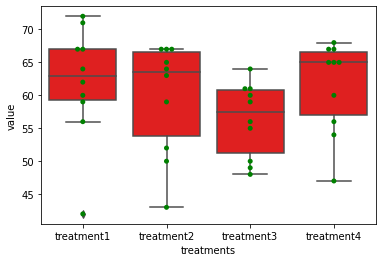

In [14]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='Red')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='Green')
plt.show()